# 🎯 LangGraph: Fundamentos y Conceptos Basicos

## 📚 Objetivos de Aprendizaje

En este notebook aprenderas:
- ✅ Configurar LangGraph correctamente
- ✅ Entender StateGraph, nodos y aristas
- ✅ Implementar herramientas personalizadas
- ✅ Manejar persistencia y estado
- ✅ Crear tus primeros agentes multi-agente

---

# 🛠️ 1. Configuracion del Entorno

In [4]:
# Instalacion de dependencias
!pip install -q langgraph langchain_openai langchain_core langchain_community
!pip install -q langchain-google-genai langgraph-checkpoint-sqlite
!pip install -q python-dotenv matplotlib networkx

print("✅ Todas las dependencias instaladas correctamente")


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
✅ Todas las dependencias instaladas correctamente


In [1]:
# Configuracion de API Keys
import os
from dotenv import load_dotenv

# Cargar variables de entorno
load_dotenv()

# Para Google Colab
try:
    from google.colab import userdata
    os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
    print("✅ API Key configurada desde Google Colab")
except:
    
    if not os.environ.get("OPENAI_API_KEY"):
        print("⚠️ Configura tu OPENAI_API_KEY")
        # Descomenta la siguiente linea y agrega tu API key
        # os.environ["OPENAI_API_KEY"] = "tu-api-key-aqui"
    else:
        print("✅ API Key configurada desde variables de entorno")

✅ API Key configurada desde variables de entorno


In [6]:
# Importaciones basicas
import json
import time
import sqlite3
from typing import Literal, List, Dict, Any, Optional, TypedDict, Annotated
from datetime import datetime

# LangChain y LangGraph
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage, BaseMessage
from langchain_core.tools import tool
from langchain_core.prompts import ChatPromptTemplate

# LangGraph core
from langgraph.graph import StateGraph, MessagesState, START, END, add_messages
from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.checkpoint.memory import MemorySaver

print("✅ Importaciones completadas")

✅ Importaciones completadas


In [10]:
# Configurar modelo principal
try:
    llm = ChatOpenAI(
        model="gpt-4o-mini",  # Modelo mas economico para aprendizaje
        temperature=0.1,
        max_tokens=1000
    )
    
    # Prueba de configuracion
    test_response = llm.invoke([HumanMessage(content="Di: 'Configuracion exitosa'")])  
    print(f"✅ {test_response.content}")
    
except Exception as e:
    print(f"❌ Error: {e}")
    print("Verifica tu API key y conexion")

✅ ¡Configuracion exitosa! Si necesitas ayuda con algo mas o tienes alguna pregunta, no dudes en decirmelo.


---

# 🧠 2. Conceptos Fundamentales de LangGraph

## ¿Que es LangGraph?

LangGraph es una biblioteca para construir **sistemas multi-agente** usando grafos. Los conceptos clave son:

- **🔗 StateGraph**: El grafo que define el flujo de ejecucion
- **📦 Estado**: Informacion que fluye entre nodos (como `MessagesState`)
- **🎯 Nodos**: Funciones que procesan el estado
- **➡️ Aristas**: Conexiones que definen el flujo
- **🎭 Agentes**: Funciones inteligentes que pueden usar herramientas

## Diagrama Conceptual

```
[Estado Inicial] → [Nodo 1] → [Nodo 2] → [Estado Final]
                      ↓         ↓
                 [Herramientas] [Decisiones]
```

In [14]:
# Ejemplo 1: Tu primer grafo simple
def mi_primer_agente(state: MessagesState) -> MessagesState:
    """
    Un agente simple que procesa mensajes.
    
    Args:
        state: Estado actual con mensajes
        
    Returns:
        Estado actualizado con nueva respuesta
    """
    print("🤖 Mi primer agente esta trabajando...")
    
    # Crear prompt del sistema
    system_prompt = "Eres un asistente educativo que explica conceptos de IA de manera simple."

    print(state)
    
    # Construir mensajes para el LLM
    messages = [SystemMessage(content=system_prompt)] + state["messages"]
    
    # Obtener respuesta
    respuesta = llm.invoke(messages)
    
    print(f"✅ Agente completo su trabajo")
    
    # Retornar estado actualizado
    return {"messages": [respuesta]}

print("✅ Funcion de agente definida")

✅ Funcion de agente definida


🏗️ Construyendo mi primer grafo...
✅ ¡Tu primer grafo esta listo!


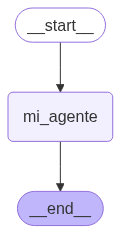

In [15]:
# Construir tu primer grafo
from IPython.display import Image

print("🏗️ Construyendo mi primer grafo...")

# 1. Crear el builder del grafo
builder = StateGraph(MessagesState)

# 2. Anadir nodo
builder.add_node("mi_agente", mi_primer_agente)

# 3. Definir flujo: START → mi_agente → END
builder.add_edge(START, "mi_agente")
builder.add_edge("mi_agente", END)

# 4. Compilar grafo
mi_primer_grafo = builder.compile()

print("✅ ¡Tu primer grafo esta listo!")

Image(mi_primer_grafo.get_graph().draw_mermaid_png())



In [17]:
# Probar tu primer grafo
print("🧪 PROBANDO MI PRIMER GRAFO")
print("=" * 40)

# Entrada del usuario
entrada = {
    "messages": [HumanMessage(content="¿Que es un grafo en LangGraph?")]
}

print(f"❓ Pregunta: {entrada['messages'][0].content}")
print("\n🔄 Ejecutando grafo...")

# Ejecutar
resultado = mi_primer_grafo.invoke(entrada)

print(f"\n🤖 Respuesta:")
print(resultado["messages"])
print("\n" + "=" * 40)
print("🎉 ¡Felicitaciones! Has ejecutado tu primer grafo LangGraph")

🧪 PROBANDO MI PRIMER GRAFO
❓ Pregunta: ¿Que es un grafo en LangGraph?

🔄 Ejecutando grafo...
🤖 Mi primer agente esta trabajando...
{'messages': [HumanMessage(content='¿Que es un grafo en LangGraph?', additional_kwargs={}, response_metadata={}, id='ff662f6a-7f86-43a9-88b1-7696c2f7e8ad')]}
✅ Agente completo su trabajo

🤖 Respuesta:
[HumanMessage(content='¿Que es un grafo en LangGraph?', additional_kwargs={}, response_metadata={}, id='ff662f6a-7f86-43a9-88b1-7696c2f7e8ad'), AIMessage(content='Un grafo en LangGraph es una estructura que se utiliza para representar relaciones entre diferentes elementos, como palabras, frases o conceptos. En terminos simples, un grafo esta compuesto por nodos (que representan los elementos) y aristas (que representan las conexiones o relaciones entre esos elementos).\n\nEn el contexto de LangGraph, los grafos pueden ayudar a modelar y entender como se relacionan diferentes partes del lenguaje, lo que puede ser util para tareas como el procesamiento del lengu

---

# 🛠️ 3. Herramientas (@tool) - Extendiendo Capacidades

Las herramientas permiten que los agentes interactuen con el mundo exterior:
- 🌐 APIs web
- 🗄️ Bases de datos  
- 🧮 Calculadoras
- 📊 Analisis de datos
- 📧 Envio de emails

## ¿Como Funcionan?

1. **Definir**: Usar decorator `@tool`
2. **Describir**: Docstring clara para que el agente entienda cuando usarla
3. **Integrar**: Pasar herramientas al agente
4. **Ejecutar**: El agente decide cuando y como usar cada herramienta

In [21]:
# Crear herramientas basicas
import random
from datetime import datetime

@tool
def calculadora_simple(expresion: str) -> str:
    """
    Realiza calculos matematicos basicos.
    
    Args:
        expresion: Expresion matematica (ej: "2 + 3 * 4")
        
    Returns:
        Resultado del calculo
    """
    try:
        # Solo permitir operaciones seguras
        allowed_chars = set("0123456789+-*/(). ")
        if not all(c in allowed_chars for c in expresion):
            return "Error: Solo numeros y operadores basicos permitidos"
        
        resultado = eval(expresion)
        return f"El resultado de '{expresion}' es: {resultado}"
    except Exception as e:
        return f"Error al calcular: {str(e)}"

@tool
def obtener_fecha_actual() -> str:
    """
    Obtiene la fecha y hora actual.
    
    Returns:
        Fecha y hora actuales
    """
    ahora = datetime.now()
    return f"Hoy es {ahora.strftime('%Y-%m-%d')} y son las {ahora.strftime('%H:%M:%S')}"

@tool
def buscar_definicion(termino: str) -> str:
    """
    Busca la definicion de terminos tecnicos de IA.
    
    Args:
        termino: Termino a definir
        
    Returns:
        Definicion del termino
    """
    definiciones = {
        "machine learning": "Subcampo de la IA que permite a las maquinas aprender patrones de los datos sin programacion explicita.",
        "deep learning": "Tecnica de ML que usa redes neuronales profundas para aprender representaciones complejas.",
        "llm": "Large Language Model - Modelo de lenguaje grande entrenado con enormes cantidades de texto.",
        "grafo": "Estructura de datos que consiste en nodos conectados por aristas.",
        "agente": "Sistema de IA que puede percibir su entorno y tomar acciones para lograr objetivos."
    }
    
    termino_lower = termino.lower()
    if termino_lower in definiciones:
        return f"📚 {termino}: {definiciones[termino_lower]}"
    else:
        return f"🤔 No encontre definicion para '{termino}'. Terminos disponibles: {', '.join(definiciones.keys())}"

@tool  
def generar_numero_aleatorio(minimo: int = 1, maximo: int = 100) -> str:
    """
    Genera un numero aleatorio en un rango.
    
    Args:
        minimo: Valor minimo (default: 1)
        maximo: Valor maximo (default: 100)
        
    Returns:
        Numero aleatorio generado
    """
    numero = random.randint(minimo, maximo)
    return f"🎲 Numero aleatorio entre {minimo} y {maximo}: {numero}"

# Lista de herramientas
mis_herramientas = [
    calculadora_simple,
    obtener_fecha_actual,
    buscar_definicion,
    generar_numero_aleatorio
]

print("🛠️ Herramientas creadas:")
for herramienta in mis_herramientas:
    print(f"  ✅ {herramienta.name}")
print(f"\n📊 Total: {len(mis_herramientas)} herramientas disponibles")

🛠️ Herramientas creadas:
  ✅ calculadora_simple
  ✅ obtener_fecha_actual
  ✅ buscar_definicion
  ✅ generar_numero_aleatorio

📊 Total: 4 herramientas disponibles


In [24]:
# Crear agente con herramientas
print("🤖 Creando agente con herramientas...")

# Prompt personalizado para el agente
system_prompt = """
Eres un tutor de IA inteligente con acceso a herramientas especializadas.

HERRAMIENTAS DISPONIBLES:
- calculadora_simple: Para hacer calculos matematicos
- obtener_fecha_actual: Para saber la fecha y hora
- buscar_definicion: Para definir terminos tecnicos
- generar_numero_aleatorio: Para generar numeros aleatorios

INSTRUCCIONES:
1. Analiza la pregunta del estudiante
2. Decide que herramientas necesitas usar
3. Usa las herramientas en el orden correcto
4. Proporciona una respuesta educativa clara
5. Si no necesitas herramientas, responde directamente

Se didactico y explica el proceso paso a paso.
"""

# Crear agente ReAct (Reasoning + Acting)
mi_agente_con_herramientas = create_react_agent(
    llm, 
    mis_herramientas,
    prompt=system_prompt
)

print("✅ Agente con herramientas creado")
print("🎯 Listo para responder preguntas y usar herramientas")

🤖 Creando agente con herramientas...
✅ Agente con herramientas creado
🎯 Listo para responder preguntas y usar herramientas


In [25]:
# Funcion para probar el agente con herramientas
def probar_agente(pregunta: str, thread_id: str = "demo"):
    """
    Prueba el agente con una pregunta especifica.
    """
    print(f"\n❓ Pregunta: {pregunta}")
    print("=" * 60)
    
    entrada = {"messages": [HumanMessage(content=pregunta)]}
    config = {"configurable": {"thread_id": thread_id}}
    
    try:
        resultado = mi_agente_con_herramientas.invoke(entrada, config=config)
        respuesta_final = resultado["messages"][-1].content
        
        print("🤖 Respuesta del agente:")
        print(respuesta_final)
        
    except Exception as e:
        print(f"❌ Error: {e}")
    
    print("=" * 60)

# Pruebas del agente
print("🧪 PROBANDO AGENTE CON HERRAMIENTAS")

# Prueba 1: Calculo matematico
probar_agente("¿Cuanto es 15 * 8 + 32?", "test1")

🧪 PROBANDO AGENTE CON HERRAMIENTAS

❓ Pregunta: ¿Cuanto es 15 * 8 + 32?
🤖 Respuesta del agente:
Para resolver la expresion \( 15 \times 8 + 32 \), seguimos estos pasos:

1. Primero, multiplicamos \( 15 \) por \( 8 \):
   \[
   15 \times 8 = 120
   \]

2. Luego, sumamos \( 32 \) al resultado de la multiplicacion:
   \[
   120 + 32 = 152
   \]

Por lo tanto, el resultado de \( 15 \times 8 + 32 \) es \( 152 \).


In [26]:
# Prueba 2: Busqueda de definicion
probar_agente("¿Que es machine learning?", "test2")


❓ Pregunta: ¿Que es machine learning?
🤖 Respuesta del agente:
Machine learning, o aprendizaje automatico, es un subcampo de la inteligencia artificial (IA) que permite a las maquinas aprender patrones a partir de los datos sin necesidad de programacion explicita. Esto significa que, en lugar de ser programadas para realizar tareas especificas, las maquinas pueden analizar datos, identificar patrones y hacer predicciones o tomar decisiones basadas en esos patrones aprendidos. 

Este enfoque se utiliza en una variedad de aplicaciones, desde recomendaciones de productos hasta reconocimiento de voz y vision por computadora.


In [28]:
# Prueba 3: Multiples herramientas
probar_agente("como te llamas?")


❓ Pregunta: como te llamas?
🤖 Respuesta del agente:
Soy un asistente de inteligencia artificial y no tengo un nombre propio. Puedes llamarme simplemente "asistente" o "IA". Estoy aqui para ayudarte con tus preguntas y necesidades. ¿En que puedo asistirte hoy?


---

# 💾 4. Persistencia y Estado - Memoria Entre Sesiones

La persistencia permite que los agentes "recuerden" conversaciones anteriores. Esto es esencial para:

- 🧠 **Memoria de Conversacion**: Recordar contexto anterior
- 👤 **Personalizacion**: Adaptar respuestas al usuario
- 🔄 **Continuidad**: Reanudar conversaciones interrumpidas
- 🐛 **Debugging**: Revisar el historial de ejecucion

## Tipos de Persistencia

1. **MemorySaver**: Almacenamiento temporal en memoria
2. **SqliteSaver**: Almacenamiento permanente en base de datos

## Conceptos Clave

- **Checkpointer**: Guarda y restaura el estado
- **Thread ID**: Identifica conversaciones unicas
- **Estado Personalizado**: Informacion adicional persistente

In [3]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.checkpoint.sqlite import SqliteSaver
import sqlite3

print("💾 Configurando persistencia...")

checkpointer_memoria = MemorySaver()
print("✅ MemorySaver: Datos en memoria")

conexion_sqlite = sqlite3.connect(":memory:", check_same_thread=False)
checkpointer_sqlite = SqliteSaver(conexion_sqlite)
print("✅ SqliteSaver: Base de datos SQLite")

print("\n🎯 Sistemas de persistencia listos")


💾 Configurando persistencia...
✅ MemorySaver: Datos en memoria
✅ SqliteSaver: Base de datos SQLite

🎯 Sistemas de persistencia listos


In [4]:
# Configurar sistemas de persistencia
print("💾 Configurando persistencia...")

# 1. Persistencia en memoria (temporal)
checkpointer_memoria = MemorySaver()
print("✅ MemorySaver: Datos en memoria")

# 2. Persistencia en SQLite (permanente)
conexion_sqlite = sqlite3.connect(":memory:", check_same_thread=False)
checkpointer_sqlite = SqliteSaver(conexion_sqlite)
print("✅ SqliteSaver: Base de datos SQLite")

print("\n🎯 Sistemas de persistencia listos")

💾 Configurando persistencia...
✅ MemorySaver: Datos en memoria
✅ SqliteSaver: Base de datos SQLite

🎯 Sistemas de persistencia listos


In [32]:
# Estado personalizado para persistencia
class EstadoPersonalizado(TypedDict):
    """
    Estado que incluye informacion persistente del usuario.
    """
    # Mensajes de la conversacion
    messages: Annotated[List[BaseMessage], add_messages]
    
    # Informacion del usuario
    nombre_usuario: str
    intereses: List[str]
    nivel_experiencia: str  # principiante, intermedio, avanzado
    
    # Metricas de sesion
    numero_sesion: int
    preguntas_realizadas: int
    
    # Configuracion personalizada
    preferencias: Dict[str, Any]

def agente_personalizado(state: EstadoPersonalizado) -> EstadoPersonalizado:
    """
    Agente que usa informacion persistente para personalizar respuestas.
    """
    # Obtener informacion del usuario
    nombre = state.get("nombre_usuario", "Estudiante")
    intereses = state.get("intereses", [])
    nivel = state.get("nivel_experiencia", "principiante")
    sesion = state.get("numero_sesion", 0) + 1
    preguntas = state.get("preguntas_realizadas", 0) + 1
    
    # Crear prompt personalizado
    system_prompt = f"""
    Eres un tutor personalizado de IA.
    
    INFORMACION DEL ESTUDIANTE:
    - Nombre: {nombre}
    - Nivel: {nivel}
    - Intereses: {intereses if intereses else 'Aun no definidos'}
    - Sesion actual: #{sesion}
    - Pregunta #{preguntas} de esta conversacion
    
    INSTRUCCIONES:
    1. Adapta tu respuesta al nivel del estudiante
    2. Relaciona con sus intereses cuando sea posible
    3. Si es la primera sesion, presentate y pregunta sobre sus intereses
    4. Recuerda conversaciones anteriores
    5. Se motivador y educativo
    """
    
    # Procesar mensajes
    messages = [SystemMessage(content=system_prompt)] + state["messages"]
    respuesta = llm.invoke(messages)
    
    # Detectar nueva informacion del usuario
    ultimo_mensaje = state["messages"][-1].content if state["messages"] else ""
    nuevos_intereses = intereses.copy()
    
    # Buscar intereses mencionados
    intereses_posibles = ["machine learning", "deep learning", "nlp", "computer vision", 
                         "robotica", "datos", "programacion", "python", "javascript"]
    
    for interes in intereses_posibles:
        if interes in ultimo_mensaje.lower() and interes not in nuevos_intereses:
            nuevos_intereses.append(interes)
    
    # Detectar nombre
    nuevo_nombre = nombre
    if "me llamo" in ultimo_mensaje.lower() or "soy" in ultimo_mensaje.lower():
        palabras = ultimo_mensaje.split()
        for i, palabra in enumerate(palabras):
            if palabra.lower() in ["llamo", "soy"] and i + 1 < len(palabras):
                nuevo_nombre = palabras[i + 1].capitalize()
                break
    
    return {
        "messages": [respuesta],
        "nombre_usuario": nuevo_nombre,
        "intereses": nuevos_intereses,
        "nivel_experiencia": nivel,
        "numero_sesion": sesion,
        "preguntas_realizadas": preguntas,
        "preferencias": state.get("preferencias", {})
    }

print("👤 Agente personalizado definido")

👤 Agente personalizado definido


🏗️ Creando grafo con persistencia...
✅ Grafo con persistencia creado
🧠 El agente recordara conversaciones anteriores


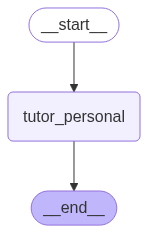

In [33]:
# Crear grafo con persistencia
print("🏗️ Creando grafo con persistencia...")

builder_persistente = StateGraph(EstadoPersonalizado)
builder_persistente.add_node("tutor_personal", agente_personalizado)
builder_persistente.add_edge(START, "tutor_personal")
builder_persistente.add_edge("tutor_personal", END)

# Compilar con checkpointer
grafo_persistente = builder_persistente.compile(checkpointer=checkpointer_sqlite)

print("✅ Grafo con persistencia creado")
print("🧠 El agente recordara conversaciones anteriores")
Image(grafo_persistente.get_graph().draw_mermaid_png())

In [35]:
# Funcion para conversar con persistencia
def conversar_con_memoria(mensaje: str, usuario_id: str = "estudiante_1"):
    """
    Conversa con el agente que tiene memoria persistente.
    """
    print(f"\n👤 Tu: {mensaje}")
    print("-" * 50)
    
    config = {"configurable": {"thread_id": usuario_id}}
    entrada = {"messages": [HumanMessage(content=mensaje)]}
    
    try:
        resultado = grafo_persistente.invoke(entrada, config=config)
        
        # Mostrar respuesta
        respuesta = resultado["messages"][-1].content
        print(f"🤖 Tutor: {respuesta}")
        
        # Mostrar informacion persistente
        print(f"\n📊 Info Persistente:")
        print(f"   👤 Usuario: {resultado.get('nombre_usuario', 'N/A')}")
        print(f"   🎯 Intereses: {resultado.get('intereses', [])}")
        print(f"   📈 Nivel: {resultado.get('nivel_experiencia', 'N/A')}")
        print(f"   🔢 Sesion: #{resultado.get('numero_sesion', 0)}")
        print(f"   ❓ Preguntas: {resultado.get('preguntas_realizadas', 0)}")
        
    except Exception as e:
        print(f"❌ Error: {e}")
    
    print("-" * 50)

print("✅ Sistema de conversacion con memoria listo")

✅ Sistema de conversacion con memoria listo


In [36]:
# Demostracion de persistencia
print("🧪 DEMOSTRACION DE PERSISTENCIA")
print("=" * 60)

# Conversacion 1
conversar_con_memoria("Hola, me llamo Ana y me interesa mucho el machine learning")

🧪 DEMOSTRACION DE PERSISTENCIA

👤 Tu: Hola, me llamo Ana y me interesa mucho el machine learning
--------------------------------------------------
🤖 Tutor: ¡Hola Ana! Es un placer conocerte. Me alegra saber que te interesa el machine learning, es un campo fascinante y muy relevante en la actualidad. 

El machine learning, o aprendizaje automatico, es una rama de la inteligencia artificial que permite a las computadoras aprender de los datos y mejorar su rendimiento con el tiempo sin ser programadas explicitamente para cada tarea. 

Para comenzar, ¿tienes alguna area especifica dentro del machine learning que te gustaria explorar? Por ejemplo, ¿te interesa mas la teoria, la programacion, o quizas aplicaciones practicas como el reconocimiento de imagenes o el procesamiento de lenguaje natural? Estoy aqui para ayudarte a descubrir mas sobre este tema y guiarte en tu aprendizaje. ¡Vamos a aprender juntos!

📊 Info Persistente:
   👤 Usuario: Ana
   🎯 Intereses: ['machine learning']
   📈 Niv

In [38]:
# Conversacion 2 - deberia recordar el nombre
conversar_con_memoria("que es lo que me interesa?")


👤 Tu: que es lo que me interesa?
--------------------------------------------------
🤖 Tutor: ¡Buena pregunta, Ana! Hasta ahora, has mencionado que te interesa el machine learning y, por extension, el deep learning. Estos son campos muy amplios y emocionantes, y hay muchas areas dentro de ellos que podrias explorar. 

Aqui hay algunas preguntas que podrian ayudarte a identificar mas especificamente tus intereses:

1. **¿Te gusta mas la teoria o la practica?**: ¿Prefieres entender como funcionan los algoritmos y las matematicas detras del machine learning, o te gustaria mas trabajar en proyectos practicos y ver como se aplican estas tecnicas en el mundo real?

2. **¿Hay alguna aplicacion especifica que te llame la atencion?**: Por ejemplo, ¿te interesa el reconocimiento de imagenes, el procesamiento de lenguaje natural, la prediccion de datos, o quizas algo relacionado con la salud o los negocios?

3. **¿Te gustaria aprender a programar?**: Si aun no tienes experiencia en programacion, 

In [25]:
# Conversacion 3 - deberia recordar todo el contexto
conversar_con_memoria("Tambien me interesa la programacion en Python")


👤 Tu: Tambien me interesa la programacion en Python
--------------------------------------------------
🤖 Tutor: ¡Genial, Ana! Python es un lenguaje de programacion muy popular en el campo del machine learning y el deep learning. Es conocido por su simplicidad y legibilidad, lo que lo hace ideal para principiantes. Ademas, tiene muchas bibliotecas poderosas que facilitan el trabajo con datos y la construccion de modelos de aprendizaje automatico.

Aqui hay algunas bibliotecas de Python que son especialmente utiles para el machine learning y el deep learning:

1. **NumPy**: Es fundamental para el manejo de arreglos y operaciones matematicas. Te ayudara a trabajar con datos numericos de manera eficiente.

2. **Pandas**: Esta biblioteca es excelente para la manipulacion y analisis de datos. Te permite trabajar con estructuras de datos como DataFrames, que son muy utiles para manejar conjuntos de datos.

3. **Matplotlib y Seaborn**: Estas bibliotecas son utiles para la visualizacion de dat